<a href="https://colab.research.google.com/github/Oughty-Otieno/Recurrent-Neural-Networks-with-Python---Project/blob/'main'/AfterWork_Data_Science_Recurrent_Neural_Networks_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [1]:
# Importing standard libraries
# ---
# 
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [2]:
# Importing our dataset
# ---
#
train = pd.read_csv('https://bit.ly/38dSbSb')
test = pd.read_csv('https://bit.ly/3kW8E0K')

print(train.shape)

print(test.shape)

(1258, 7)
(212, 7)


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [3]:
# Sample dataset
# ---
#
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [4]:
# Statistical summary
# ---
#
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,3.199790e+01,1.691151e+01,5.324,8.403000e+00,3.941100e+01,4.521450e+01,5.753400e+01
High,1258.0,3.255867e+01,1.714854e+01,5.370,8.556000e+00,4.012400e+01,4.593500e+01,5.828400e+01
Low,1258.0,3.140370e+01,1.664924e+01,4.528,8.197000e+00,3.870900e+01,4.430300e+01,5.608000e+01
Close,1258.0,3.198924e+01,1.690350e+01,4.558,8.379500e+00,3.942700e+01,4.507650e+01,5.720800e+01
Adj Close,1258.0,3.198924e+01,1.690350e+01,4.558,8.379500e+00,3.942700e+01,4.507650e+01,5.720800e+01
Volume,1258.0,2.551310e+07,2.259037e+07,1824500.000,1.059400e+07,2.007650e+07,3.245150e+07,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [5]:
# Getting our train dataset
# We will use the 'Open' price for prediction.
#
train_set = train.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [6]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [7]:
# Creating a Data structure with 60 timesteps and 1 output
# ---
# A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. 
# The number of past timestamps is set to 60 based on experimentation.
# Thus, X_train is a nested list, which contains lists of 60 time-stamp prices. 
# y_train is a list of stock prices which is the next day stock price, corresponding to each list in X_train.
# ---
#
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [8]:
# Previewing X_train
print(X_train)

[[0.00888719 0.00609079 0.00436698 ... 0.03436123 0.04037541 0.04275043]
 [0.00609079 0.00436698 0.0022218  ... 0.04037541 0.04275043 0.04432101]
 [0.00436698 0.0022218  0.00145566 ... 0.04275043 0.04432101 0.04175445]
 ...
 [0.71128134 0.71434589 0.71105156 ... 0.69565219 0.69480939 0.72116457]
 [0.71434589 0.71105156 0.67358745 ... 0.69480939 0.72116457 0.74663857]
 [0.71105156 0.67358745 0.66799466 ... 0.72116457 0.74663857 0.73526148]]


In [9]:
# Previewing y_train
# ---
#
print(y_train)

[0.04432101 0.04175445 0.04102662 ... 0.74663857 0.73526148 0.72660406]


In [10]:
# Reshaping 
# ---
#
# Reshaping our Dataset
# ---
# Here, only the features which are to be fed to the neural network are chosen. 
# We choose the features Date, open, high, low, close, and volume.
# ---
# We also reshape our dataset to have 3D shape. We do this because 
# the input to LSTM layer of our RNN should be in 3D shape i.e. (samples, time-steps, features/indicators).
# a. The samples are the number of samples in the input data. 
# b. The time-steps is the number of time-steps per sample. 
# c. Features correspond to the number of features per time-step i.e. one feature per time-step.
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [11]:
# Building the RNN
# ---
#
# Importing the Keras libraries and packages
# ---
#
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initialising the RNN
# ---
#
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# ---
# 'units' is the number of LSTM neurons in the layer
# 'return_sequences' is True as we need to add another LSTM layer after the current one.
# 'input_shape' corresponds to the number of time stamps and the number of indicators.
#  For 'Dropout', 20% of 50 neurons will be ignored randomly during each iteration of training.
# ---
# 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding 4 LSTM layers and some Dropout regularisation
# ---
#
# Adding a second LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# ---
# 'return_sequences' is False as we will not add more LSTM layers after this one.
# ---
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))


# Adding the output layer
# ---
#
# ---
# 'output dimension' is 1 since we are predicting 1 price each time.
# ---
#
regressor.add(Dense(units = 1))

In [13]:
# Compile the RNN 
# ---
#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
# Fitting the RNN to the training set
# ---
#
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 17s 125ms/step - loss: 0.0517
Epoch 2/100
38/38 [==============================] - 7s 176ms/step - loss: 0.0086
Epoch 3/100
38/38 [==============================] - 9s 238ms/step - loss: 0.0077
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0083
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0081
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0066
Epoch 7/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0068
Epoch 8/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0064
Epoch 9/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0061
Epoch 10/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0054
Epoch 13/100

In [15]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#
# checking the Test Dataset
test.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [20]:
real_stock_price = test.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [23]:
# concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.

dataset_total = pd.concat((train['Open'], test['Open']), axis=0)
dataset_total.shape

(1470,)

In [25]:
# we create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.

inputs = dataset_total[len(dataset_total) - len(test) - 60:].values

In [27]:
#  reshape test dataset to have 3D shape# reshape the inputs to have only 1 column

inputs = inputs.reshape(-1, 1)

In [28]:
# use the scale set by the training set to scale the test inputs

inputs = sc.transform(inputs)

In [29]:
# create the test data structure just as we did for the train dataset

X_test = []

for i in range(60, 272):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [31]:
#  reshape test dataset to have 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test.shape

(212, 60, 1)

In [32]:
# make predictions

predicted_stock_price = regressor.predict(X_test)

In [33]:
# since we have predicted the scaled values, we reverse those values

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 34.714294]
 [ 37.235344]
 [ 43.17641 ]
 [ 52.201107]
 [ 62.856342]
 [ 73.01591 ]
 [ 81.21888 ]
 [ 87.57791 ]
 [ 92.26263 ]
 [ 94.98589 ]
 [ 96.066826]
 [ 96.38554 ]
 [ 97.11727 ]
 [ 98.59975 ]
 [100.65656 ]
 [102.48977 ]
 [103.94756 ]
 [105.173035]
 [107.0086  ]
 [109.76956 ]
 [113.55939 ]
 [121.151726]
 [131.69316 ]
 [140.24347 ]
 [144.8005  ]
 [147.01938 ]
 [147.88554 ]
 [148.16005 ]
 [147.68799 ]
 [147.32603 ]
 [148.46085 ]
 [152.66998 ]
 [159.17421 ]
 [165.9613  ]
 [170.06743 ]
 [171.0407  ]
 [168.69836 ]
 [163.40207 ]
 [155.17055 ]
 [146.69391 ]
 [141.36208 ]
 [139.65706 ]
 [139.92877 ]
 [140.1361  ]
 [138.16702 ]
 [134.74866 ]
 [130.8777  ]
 [126.53676 ]
 [122.19826 ]
 [116.818665]
 [110.03754 ]
 [102.0203  ]
 [ 93.50536 ]
 [ 86.12475 ]
 [ 80.8974  ]
 [ 78.480545]
 [ 79.47143 ]
 [ 83.39989 ]
 [ 88.34691 ]
 [ 92.66783 ]
 [ 95.467995]
 [ 96.70674 ]
 [ 96.516975]
 [ 95.68353 ]
 [ 94.890305]
 [ 94.87976 ]
 [ 95.9445  ]
 [ 97.92259 ]
 [100.697556]
 [105.373764]
 [112.54374 ]
 [120.

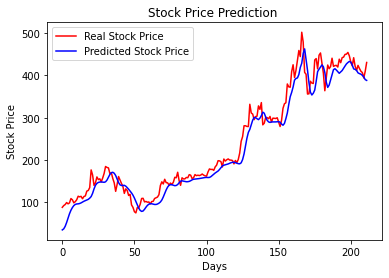

In [34]:
# visualize the results

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction ')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:
# metric used is RMSE. the smaller the RMSE value, the better the model.

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

25.738172101886416


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your observation goes here:

The models RMSE is 25, slightly above the target.This is still good though. Judging from the graph, the model genelised well.

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?
Yes we had the right question

#### b) Did we have the right data?
The data for training was okay

#### c) What can be done to improve the solution?
A quick look at the testing data shows some date values for the year 2020. There is a big chance that the test data had irrelevant data that probaly made it difficult to achieve the target RMSE.